In [4]:
import numpy as np
%run alg_genning.ipynb

Support algs imported!
Cube initiated
Gripbased alg genning initiated


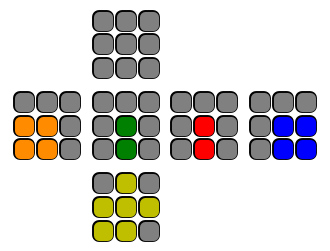

In [ ]:
cubestate = np.array([0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,2,0,0,0,0,0,3,3,0,3,3,0,0,0,4,4,0,4,4,0,0,0,0,0,0,0,0,0,0,0,6,0,6,6,6,6,6,0]) # xcross

move_transition = np.array([ 
#   [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44],
    [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
	# Start (homegrip)
#   [ R,R2,R', L,L2,L', r,r2,r', l,l2,l', M,M2,M', U,U2,U', D,D2,D', u,u2,u', d,d2,d', E,E2,E', F,F2,F', B,B2,B', f,f2,f', b,b2,b', S,S2,S'],
    [ 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

In [ ]:
def get_stats(cubestate, move_transition, allowed_moves = np.full(45,10,dtype=int), start_grips = np.array([1]), max_moves = 9, N = 100, scramble_length = 20, solve_CP = False):

    search_depth = max_moves//2
    table_depth = max_moves - search_depth
    search_algs, table = generic_solver_setup(cubestate, search_depth, table_depth, move_transition, allowed_moves=allowed_moves, start_grips = np.array([1]))

    tot_moves = 0
    tot_solves = 0

    for i in range(N):
        scramble = transition_scrambler(scramble_length, move_transition, start_grips)
        scramble = array_to_alg(scramble)
        solve = generic_solver(scramble, cubestate, search_algs, table, string_alg = False, solve_CP=solve_CP)
        if solve is not None:
            tot_solves += 1
            tot_moves += len(solve)
            print(f"Scramble {i+1}/{N} solved in {len(solve)} moves")
        else:
            print(f"Scramble {i+1}/{N} not solved")

    return tot_solves, tot_moves/(tot_solves)

get_stats(cubestate, move_transition, allowed_moves = np.full(45,10,dtype=int), start_grips = np.array([1]), max_moves = 10, N = 1000, scramble_length = 25)

Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.00s...
Algs of length 3 genned. Time spent: 0.00s...
Algs of length 4 genned. Time spent: 0.01s...
Algs of length 5 genned. Time spent: 0.06s...
Done genning algs. Making into np array. Time spent: 0.06s
Genning table based on 624124 algs...
62412 (10.00%) algs added in 9.75 seconds...
124824 (20.00%) algs added in 19.17 seconds...
187236 (30.00%) algs added in 29.46 seconds...
249648 (40.00%) algs added in 38.91 seconds...
312060 (50.00%) algs added in 47.81 seconds...
374472 (60.00%) algs added in 56.82 seconds...
436884 (70.00%) algs added in 65.54 seconds...
499296 (80.00%) algs added in 74.14 seconds...
561708 (90.00%) algs added in 82.85 seconds...
624120 (100.00%) algs added in 91.48 seconds...
Table generated in 91.48 seconds. Size: 244041 consisting of 624123 algs
Genning search algs...
Algs of length 1 genned. Time spent: 0.00s...
Algs of length 2 genned. Time spent: 0.

(1000, 7.991)